In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wandb
import os

run = wandb.init(project="predict_house_price", job_type="load_data")

artifact = run.use_artifact('raw_data_csv:latest', type='raw_data')

artifact_dir = artifact.download()

file_path = os.path.join(artifact_dir, "raw_data.csv")

train = pd.read_csv(file_path)

run.finish()

wandb: Currently logged in as: kngocun (kngocun-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb:   1 of 1 files downloaded.  
wandb: ERROR The nbformat package was not found. It is required to save notebook history.


In [2]:
plt.rcParams['figure.figsize'] = (10, 5) 

In [3]:
train.head(5)
train.shape, train.dtypes.value_counts(), train.head()

((1460, 81),
 object     43
 int64      35
 float64     3
 Name: count, dtype: int64,
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
missing = train.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing.to_frame(name='missing_count')

,missing_count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [7]:
# Check duplicate rows in train set
train.duplicated().sum()

0

In [8]:
# Fill 6 features with most missing values with 'None'
most_missing_6 = missing.head(6).index.tolist()
for col in most_missing_6:
    train[col] = train[col].fillna('None')


In [9]:
group_fill_cols = [
    'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2',
    'Electrical', 'GarageType', 'GarageFinish','GarageQual', 'GarageCond'
]

# Hàm fill theo mode từng nhóm
for col in group_fill_cols:
    train[col] = train.groupby("Neighborhood")[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "None"))

# Trả kết quả xác nhận
filled_cols = train[group_fill_cols].isnull().sum()
filled_cols = filled_cols[filled_cols > 0]

filled_cols  # Kiểm tra cột nào vẫn còn null sau fillna theo nhóm (nếu có)

Series([], dtype: int64)

In [10]:
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)
train["GarageYrBlt"] = train["GarageYrBlt"].fillna(train["YearBuilt"])

train["BsmtFinType1"] = train["BsmtFinType1"].fillna("None")

train["MasVnrArea"] = train["MasVnrArea"].fillna(0)


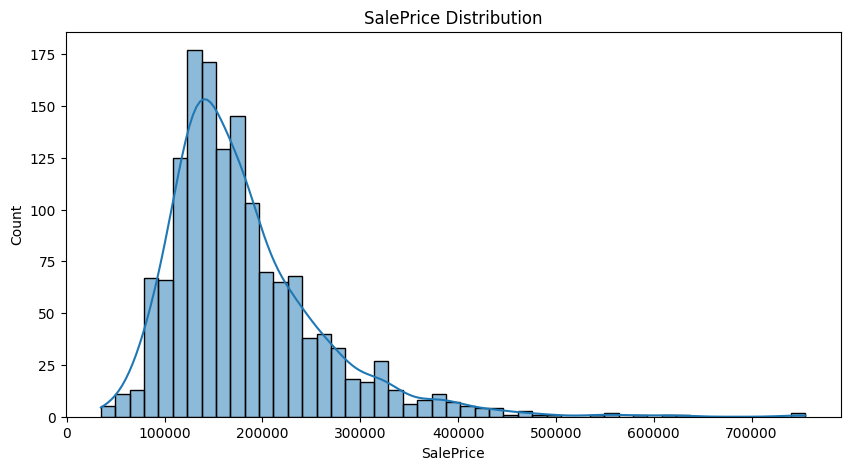

In [11]:
sns.histplot(train['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.show()

data lệch phải, cân nhắc log transform ở bước preprocessing



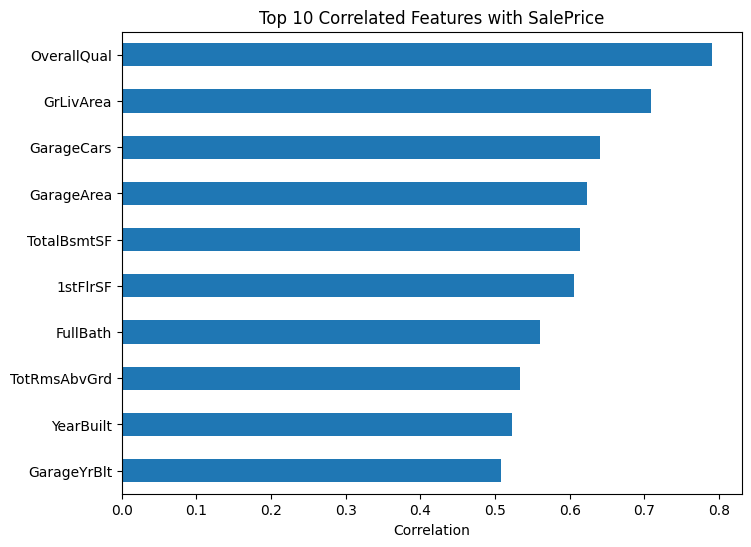

In [12]:
corr = train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
corr[1:11].plot(kind='barh', figsize=(8, 6))
plt.title('Top 10 Correlated Features with SalePrice')
plt.xlabel('Correlation')
plt.gca().invert_yaxis()
plt.show()

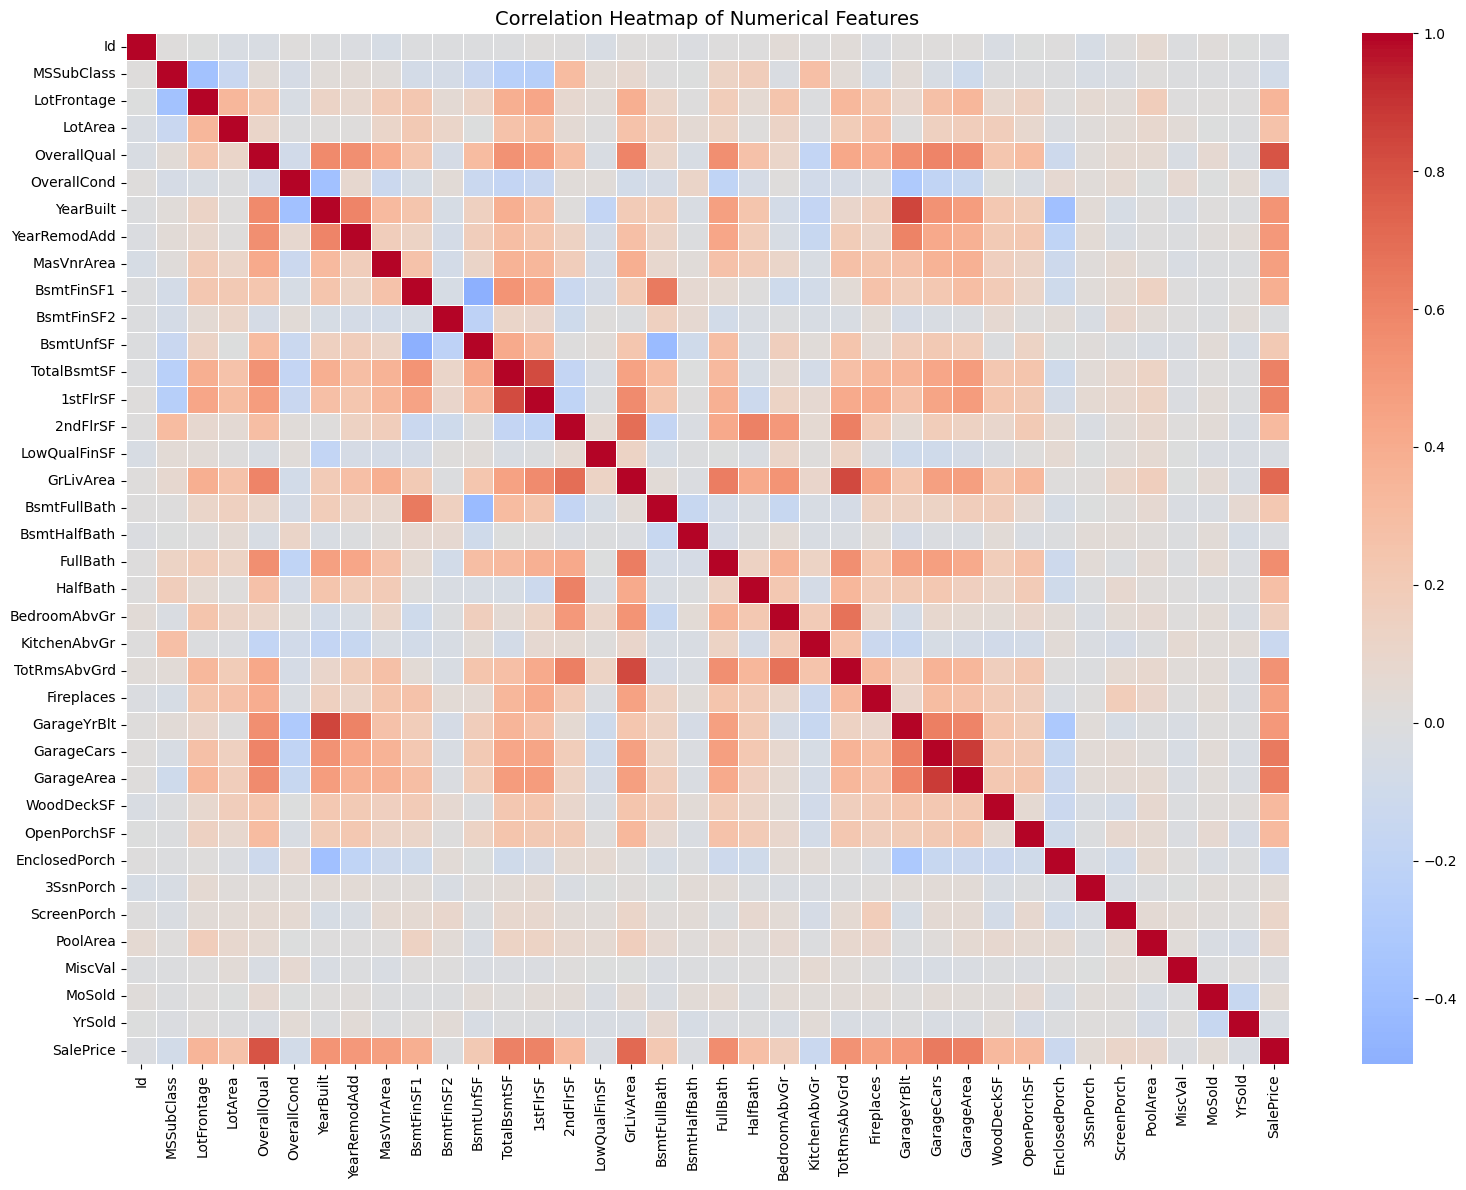

In [13]:
# Tính lại ma trận tương quan giữa các biến số
numeric_corr = train.corr(numeric_only=True)

# Vẽ heatmap đầy đủ
plt.figure(figsize=(16, 12))
sns.heatmap(numeric_corr, cmap="coolwarm", center=0, annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()


OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF… có tương quan mạnh với SalePrice.

Có một số cặp feature tương quan cao với nhau → cần kiểm tra multicollinearity (ví dụ: GarageCars và GarageArea).

Một số feature như MiscVal, LowQualFinSF, PoolArea, 3SsnPorch hầu như không liên quan gì → có thể cân nhắc loại bỏ.
xử lý multicollinearity (kiểm tra VIF) và đề xuất loại feature trùng lặp

In [14]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Chọn các biến số (numeric), loại bỏ 'Id' và 'SalePrice' nếu có
numeric_df = train.select_dtypes(include=["int64", "float64"]).drop(columns=["Id", "SalePrice"], errors="ignore")

# 2. Chuẩn hóa dữ liệu để loại bỏ ảnh hưởng của scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# 3. Tính VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# 4. Sắp xếp kết quả giảm dần
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data_sorted)


c:\Users\ASUS\Downloads\Mlop-prj-main\Mlop-prj-main\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


          Feature       VIF
9      BsmtFinSF2       inf
14   LowQualFinSF       inf
8      BsmtFinSF1       inf
15      GrLivArea       inf
10      BsmtUnfSF       inf
11    TotalBsmtSF       inf
12       1stFlrSF       inf
13       2ndFlrSF       inf
5       YearBuilt  6.106391
26     GarageArea  5.699060
25     GarageCars  5.495760
24    GarageYrBlt  4.895279
22   TotRmsAbvGrd  4.879036
3     OverallQual  3.255585
18       FullBath  2.926396
20   BedroomAbvGr  2.325174
6    YearRemodAdd  2.316880
16   BsmtFullBath  2.220460
19       HalfBath  2.166477
0      MSSubClass  1.674413
1     LotFrontage  1.666293
21   KitchenAbvGr  1.596670
23     Fireplaces  1.577648
4     OverallCond  1.567843
7      MasVnrArea  1.395661
29  EnclosedPorch  1.284126
2         LotArea  1.267224
28    OpenPorchSF  1.218206
27     WoodDeckSF  1.216025
17   BsmtHalfBath  1.151685
31    ScreenPorch  1.109763
32       PoolArea  1.102049
35         YrSold  1.051668
34         MoSold  1.050028
30      3SsnPorch  1

In [15]:
train = train.drop(columns=["LowQualFinSF", "BsmtFinSF2", "BsmtUnfSF"])

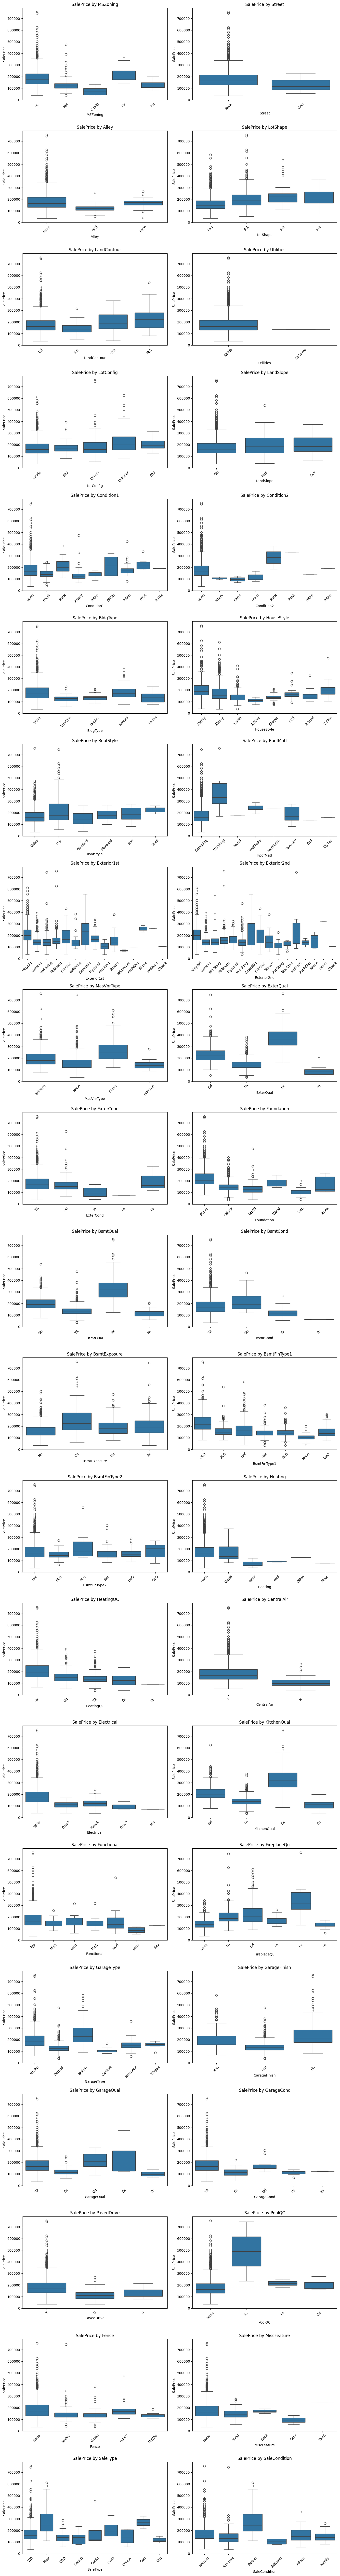

In [16]:
# Re-import needed packages and reload the dataset after reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lấy toàn bộ các cột dạng object (categorical)
categorical_cols = train.select_dtypes(include="object").columns.tolist()

# Lọc ra các biến phân loại có ít hơn 20 giá trị duy nhất để trực quan hóa
categorical_cols_to_plot = [col for col in categorical_cols if train[col].nunique() <= 20]

# Vẽ boxplot cho từng biến phân loại trên cùng một figure với nhiều subplot (thu nhỏ lại)
num_plots = len(categorical_cols_to_plot)
cols = 2  # số cột subplot
rows = (num_plots + cols - 1) // cols  # tính số hàng cần thiết

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols_to_plot):
    sns.boxplot(x=col, y="SalePrice", data=train, ax=axes[i])
    axes[i].set_title(f"SalePrice by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("SalePrice")
    axes[i].tick_params(axis='x', rotation=45)

# Ẩn các subplot thừa nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


from sklearn.preprocessing import OrdinalEncoder

# Các biến phân loại có thứ bậc rõ ràng cần encode
ordinal_cols = ["ExterQual", "KitchenQual", "BsmtQual", "PoolQC"]

# Thứ tự thứ bậc từ thấp đến cao (None -> Poor -> Excellent)
quality_order = ["None", "Po", "Fa", "TA", "Gd", "Ex"]

# Tạo encoder và encode các cột
encoder = OrdinalEncoder(categories=[quality_order]*len(ordinal_cols))
train[ordinal_cols] = encoder.fit_transform(train[ordinal_cols])

# Danh sách cột ordinal đã encode
ordinal_encoded = ["ExterQual", "KitchenQual", "BsmtQual", "PoolQC"]

# Tìm các biến phân loại còn lại
all_cat_cols = df.select_dtypes(include="object").columns.tolist()
nominal_cols = [col for col in all_cat_cols if col not in ordinal_encoded]

# Lọc chỉ các cột có số lượng nhóm hợp lý (≤ 20) để one-hot encode
nominal_cols_to_encode = [col for col in nominal_cols if df[col].nunique() <= 20]

# Thực hiện one-hot encoding
df_encoded = pd.get_dummies(df, columns=nominal_cols_to_encode, drop_first=True)

freq_map = df["Neighborhood"].value_counts(normalize=True)
df["Neighborhood_FE"] = df["Neighborhood"].map(freq_map)



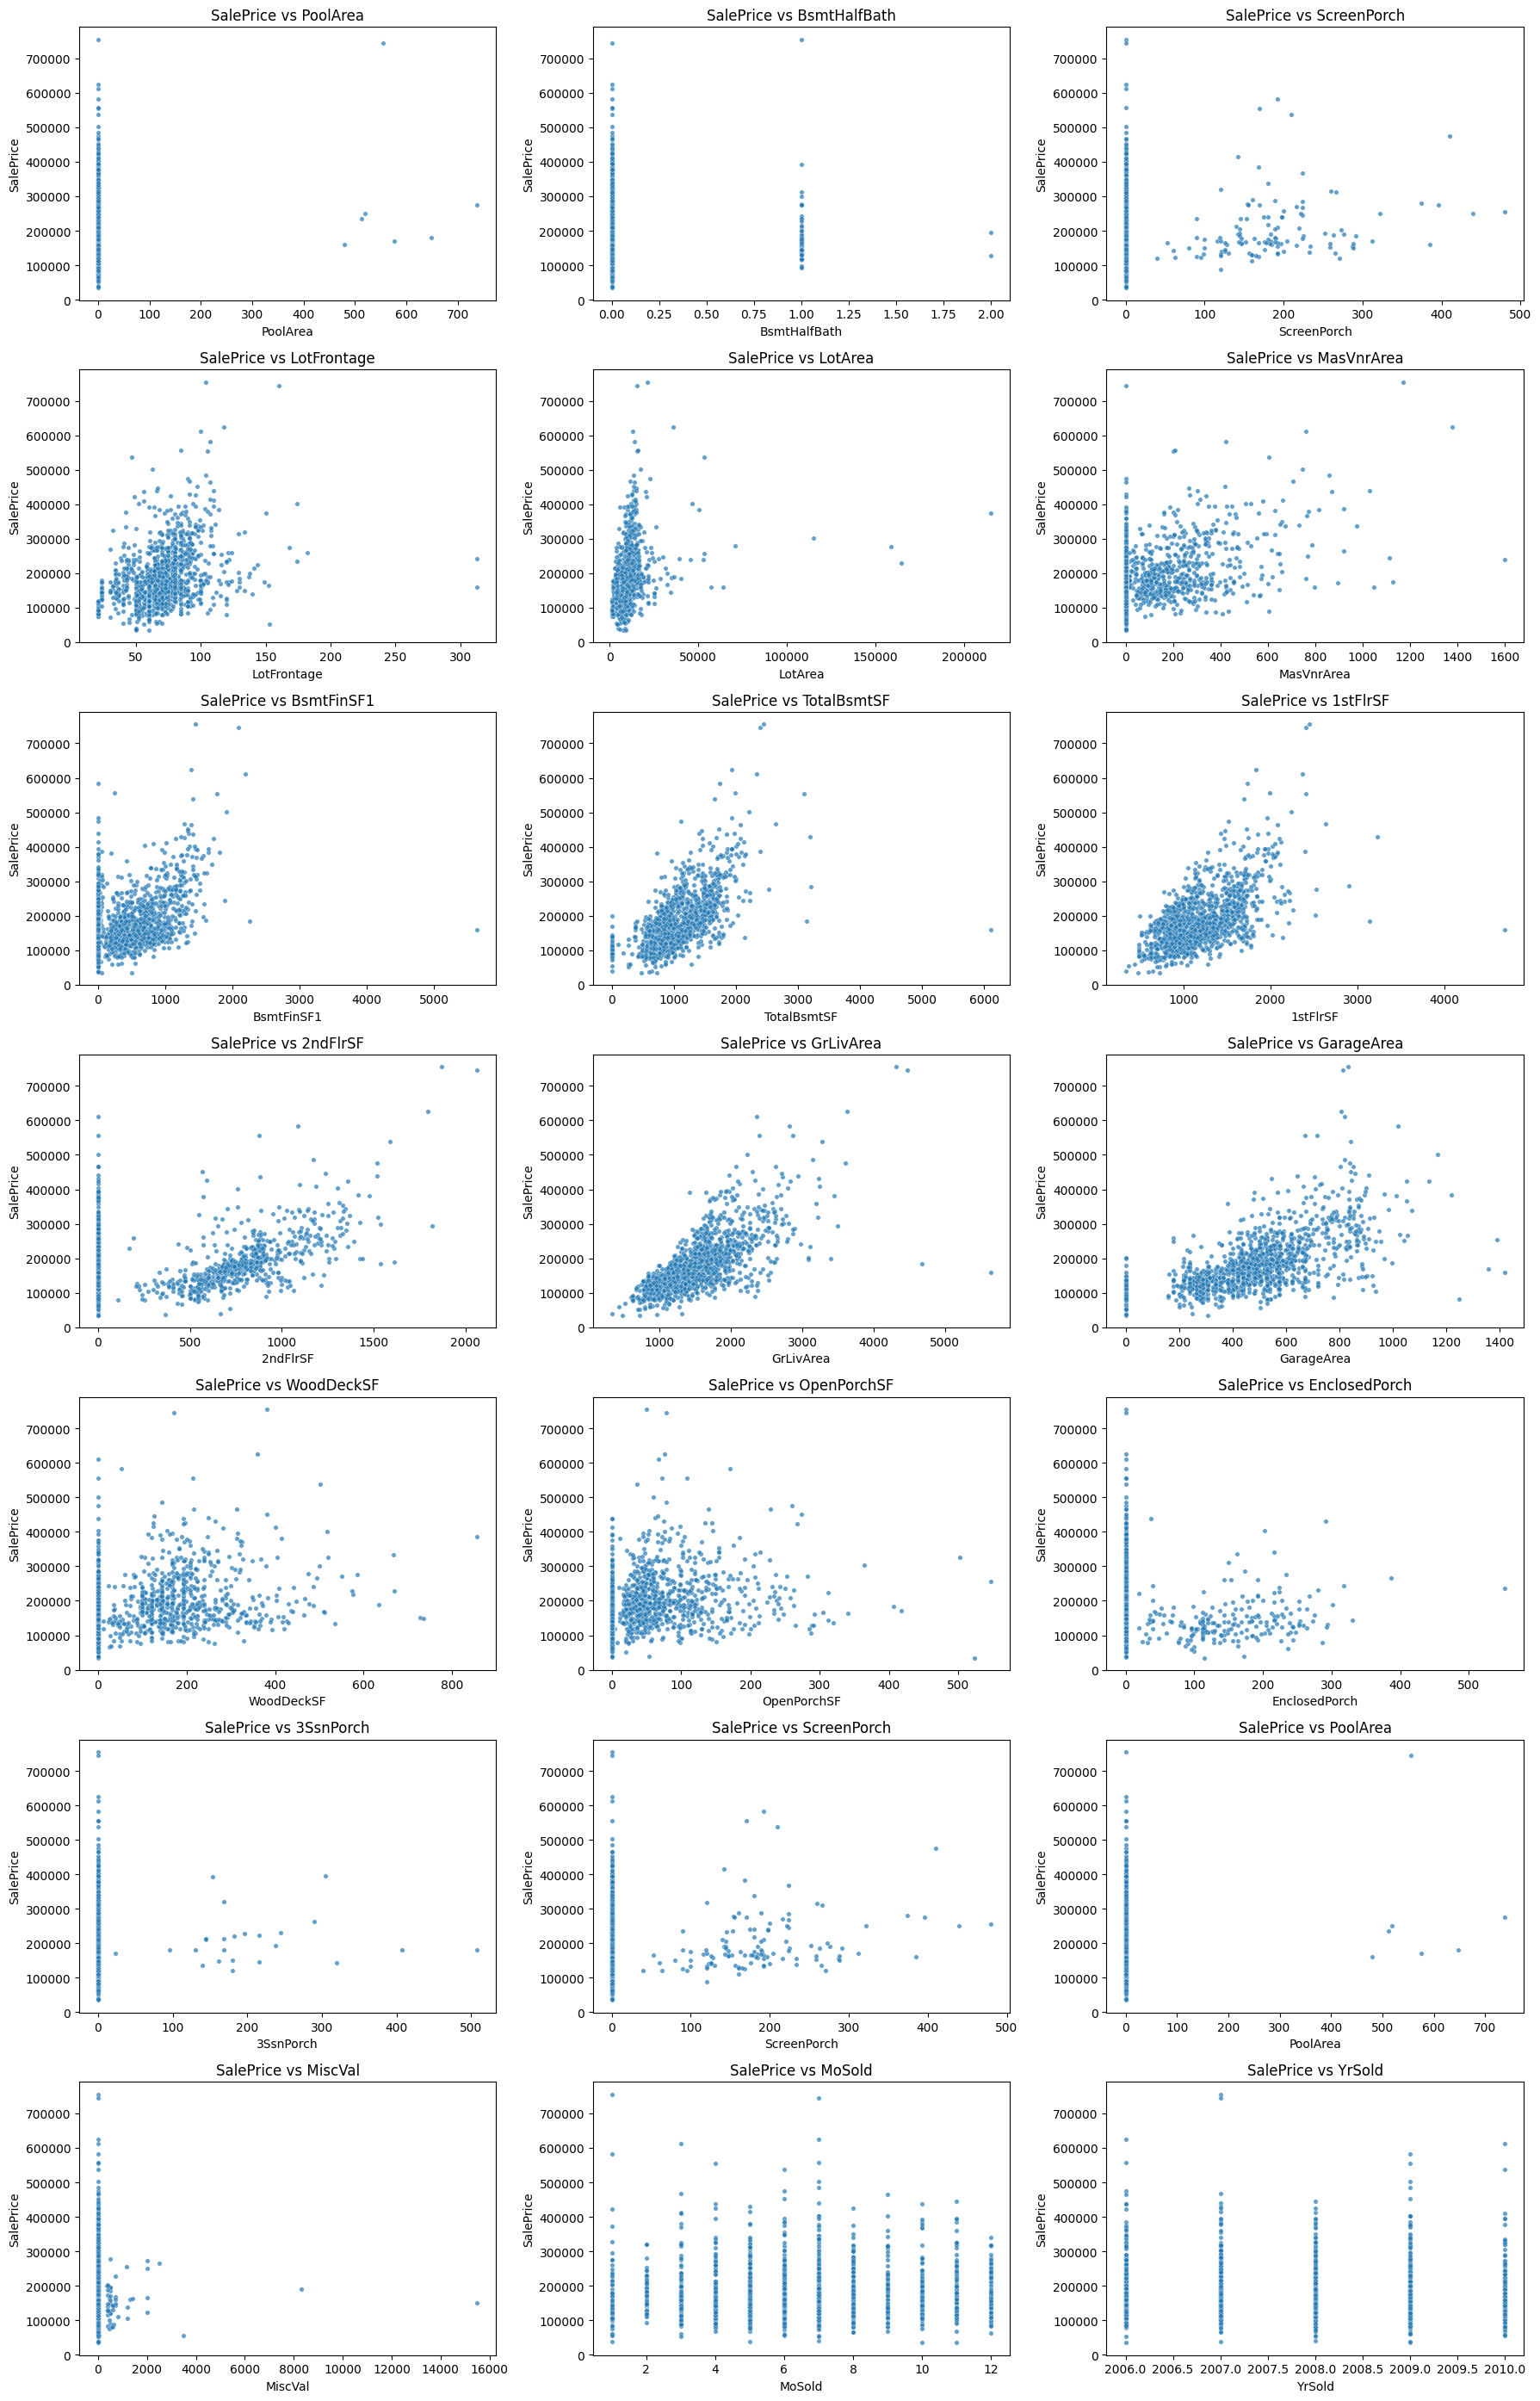

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Danh sách các feature cần kiểm tra outliers
features_to_check = ["PoolArea", "BsmtHalfBath", "ScreenPorch", "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold",]

# # Vẽ scatter plot từng feature so với SalePrice
# for feature in features_to_check:
#     plt.figure(figsize=(8, 5))
#     sns.scatterplot(data=train, x=feature, y="SalePrice")
#     plt.title(f"SalePrice vs {feature}")
#     plt.xlabel(feature)
#     plt.ylabel("SalePrice")
#     plt.tight_layout()
#     plt.show()
#     # Vẽ lại các scatter plots thành các subplots cho gọn và đẹp

import math

n_features = len(features_to_check)
n_cols = 3  # Số cột subplot, có thể chỉnh lại cho phù hợp
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()

for idx, feature in enumerate(features_to_check):
    ax = axes[idx]
    sns.scatterplot(data=train, x=feature, y="SalePrice", ax=ax, s=15, alpha=0.7)
    ax.set_title(f"SalePrice vs {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("SalePrice")
    # Ẩn các subplot thừa nếu có
for j in range(idx+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



In [18]:
# Hàm kết hợp loại bỏ outliers bằng cắt ngưỡng cụ thể và IQR
def clean_outliers_combined(train):
    # 1. Cắt ngưỡng trực tiếp với những biến có scatter rõ ràng
    train = train[
        (train["GrLivArea"] <= 4000) &
        (train["TotalBsmtSF"] <= 4000) &
        (train["LotFrontage"] <= 200) &
        (train["MasVnrArea"] <= 1000) &
        (train["GarageArea"] <= 1200) &
        (train["LotArea"] <= 100000) &
        (train["MiscVal"] <= 2000) &
        (train["3SsnPorch"] <= 400) &
        (train["WoodDeckSF"] <= 600) &
        (train["OpenPorchSF"] <= 300) &
        (train["ScreenPorch"] <= 400) &
        (train["EnclosedPorch"] <= 300)
    ]

    # 2. Loại bỏ outlier bằng IQR cho các feature còn nghi ngờ
    iqr_cols = ["PoolArea", "BsmtHalfBath", "2ndFlrSF", "1stFlrSF"]

    for col in iqr_cols:
        Q1 = train[col].quantile(0.25)
        Q3 = train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        train = train[(train[col] >= lower) & (train[col] <= upper)]

    return train


# Áp dụng xử lý outliers
train = clean_outliers_combined(train)

# # Xuất file mới
# # Xuất DataFrame ra file CSV
# train.to_csv("sauedasaueda.csv", index=False)


In [19]:
binarize_cols = ["3SsnPorch", "ScreenPorch", "MiscVal"]

for col in binarize_cols:
    train[col] = (train[col] > 0).astype(int)

clip_cols = {
    "LotFrontage": 200,
    "MasVnrArea": 1000,
    "GarageArea": 1200,
    "LotArea": 100000
}

for col, max_val in clip_cols.items():
    train[col] = np.clip(train[col], a_min=None, a_max=max_val)

log_cols = ["LotArea", "TotalBsmtSF", "GrLivArea", "1stFlrSF", "2ndFlrSF"]

for col in log_cols:
    train[f"{col}_log"] = np.log1p(train[col])


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1316 entries, 0 to 1458
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1316 non-null   int64  
 1   MSSubClass       1316 non-null   int64  
 2   MSZoning         1316 non-null   object 
 3   LotFrontage      1316 non-null   float64
 4   LotArea          1316 non-null   int64  
 5   Street           1316 non-null   object 
 6   Alley            1316 non-null   object 
 7   LotShape         1316 non-null   object 
 8   LandContour      1316 non-null   object 
 9   Utilities        1316 non-null   object 
 10  LotConfig        1316 non-null   object 
 11  LandSlope        1316 non-null   object 
 12  Neighborhood     1316 non-null   object 
 13  Condition1       1316 non-null   object 
 14  Condition2       1316 non-null   object 
 15  BldgType         1316 non-null   object 
 16  HouseStyle       1316 non-null   object 
 17  OverallQual      13

In [21]:
train.to_csv("clean_data.csv", index=True) 

run = wandb.init(project="predict_house_price", job_type="upload_clean_data")

artifact = wandb.Artifact(
    name="clean_data_csv",
    type="processed_data",
    description="Housing price clean data"
)

artifact.add_file("clean_data.csv")

run.log_artifact(artifact)
run.finish()


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


In [22]:
run = wandb.init(project="predict_house_price", job_type="load_data")

artifact = run.use_artifact('raw_data_csv:latest', type='raw_data')

artifact_dir = artifact.download()

file_path = os.path.join(artifact_dir, "raw_data.csv")

raw = pd.read_csv(file_path)

run.finish()

wandb:   1 of 1 files downloaded.  
wandb: ERROR The nbformat package was not found. It is required to save notebook history.
